In [290]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa as lr
import librosa.display
from glob import glob
import IPython
from IPython.display import Audio
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import scipy.io.wavfile as wav
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
# from python_speech_features import mfcc, logfbank

In [276]:
gt_data = pd.read_csv('features_3_sec.csv')
print(gt_data.shape)
gt_data.head()

(9990, 60)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [277]:
our_data = pd.read_csv('Top50.csv')
print(our_data.shape)
our_data.head()

(54, 60)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.000000.wav,30000.000000,0.401282,0.086966,0.133645,0.009270,2285.466215,1.526304e+06,2458.856004,481152.227178,...,73.30818,-5.018557,75.411310,3.809938,43.845936,-8.759356,43.631207,-4.040365,59.195137,blues
1,blues.000001.wav,30000.000000,0.326063,0.102756,0.148318,0.031166,1207.054377,6.459471e+05,1481.555388,709502.398726,...,69.39578,-3.525022,42.324207,-1.874528,42.235626,-7.966536,44.953590,-4.028606,67.800440,blues
2,classical.00000.wav,30013.333333,0.252361,0.084149,0.036233,0.000221,1505.357460,4.443073e+04,1559.228895,43765.373123,...,86.13082,-0.318471,100.835740,1.773055,95.493810,0.888721,97.099720,-0.835078,120.920820,classical
3,country.00000.wav,30081.632653,0.383930,0.081185,0.248296,0.000716,2798.065627,3.546250e+05,2847.541181,105655.136749,...,68.59460,0.612088,54.308323,4.062127,74.348236,0.907919,68.547610,4.093193,73.602806,country
4,disco.000000.wav,30000.000000,0.383889,0.101591,0.127326,0.008411,2739.188163,1.498203e+06,2460.869989,333219.464706,...,63.21444,-10.986168,89.658240,-2.868585,70.230286,-13.567414,63.092510,-2.138512,76.132126,disco


In [278]:
gt_data['label'] = preprocessing.LabelEncoder().fit_transform(gt_data['label'])
our_data['label'] = preprocessing.LabelEncoder().fit_transform(our_data['label'])

In [279]:
# dividing the data into train and test sets
X_gt = gt_data.drop(['label', 'filename', 'length'], axis=1)
y_gt = gt_data['label']
X_50 = our_data.drop(['label', 'filename', 'length'], axis=1)
y_50 = our_data['label']

In [282]:
#Modify training for CNN
X_gt=np.resize(X_gt, (9990,57)).reshape(999,10,57,1)
labels=[]
for i in range(9990):
    if i%10==0:
        labels.append(y_gt[i])
labels=pd.DataFrame(labels)
labels=to_categorical(labels)

In [283]:
#Modify testing for CNN
X_50=np.repeat([X_50],10)
X_50=np.resize(X_50, (30780,)).reshape(54,10,57,1)


y_50=to_categorical(y_50, num_classes = 10)

In [285]:
X_train = X_gt
y_train = labels
X_test = X_50
y_test = y_50

In [286]:
#CNN Model
model = Sequential()
#add model layers
model.add(Conv2D(256, kernel_size=3, activation='relu', input_shape=(10,57,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 8, 55, 256)        2560      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 53, 64)         147520    
_________________________________________________________________
flatten_4 (Flatten)          (None, 20352)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                203530    
Total params: 353,610
Trainable params: 353,610
Non-trainable params: 0
_________________________________________________________________


In [296]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train on 999 samples, validate on 54 samples
Epoch 1/500
999/999 [==============================] - 10s 10ms/sample - loss: 1.6927 - accuracy: 0.4164 - val_loss: 3.6251 - val_accuracy: 0.1481
Epoch 2/500
999/999 [==============================] - 6s 6ms/sample - loss: 1.6999 - accuracy: 0.4194 - val_loss: 3.6259 - val_accuracy: 0.1481
Epoch 3/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.6256 - accuracy: 0.4114 - val_loss: 3.8033 - val_accuracy: 0.1296
Epoch 4/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.5612 - accuracy: 0.4434 - val_loss: 3.8561 - val_accuracy: 0.1296
Epoch 5/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.5526 - accuracy: 0.4525 - val_loss: 4.1511 - val_accuracy: 0.0741
Epoch 6/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.6503 - accuracy: 0.4515 - val_loss: 4.1079 - val_accuracy: 0.1667
Epoch 7/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.5711

Epoch 57/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.2558 - accuracy: 0.5445 - val_loss: 5.7163 - val_accuracy: 0.1852
Epoch 58/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.2700 - accuracy: 0.5415 - val_loss: 5.6372 - val_accuracy: 0.1852
Epoch 59/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.2490 - accuracy: 0.5425 - val_loss: 5.8632 - val_accuracy: 0.1852
Epoch 60/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.2520 - accuracy: 0.5576 - val_loss: 5.9540 - val_accuracy: 0.1852
Epoch 61/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.2508 - accuracy: 0.5606 - val_loss: 5.9913 - val_accuracy: 0.1852
Epoch 62/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.2410 - accuracy: 0.5686 - val_loss: 6.2515 - val_accuracy: 0.1667
Epoch 63/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.2539 - accuracy: 0.5425 - val_loss: 24.2121 

Epoch 113/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.8091 - accuracy: 0.3453 - val_loss: 54.6320 - val_accuracy: 0.0370
Epoch 114/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.8028 - accuracy: 0.3243 - val_loss: 53.4821 - val_accuracy: 0.0370
Epoch 115/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.7927 - accuracy: 0.3363 - val_loss: 51.7268 - val_accuracy: 0.0185
Epoch 116/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.8067 - accuracy: 0.3343 - val_loss: 50.4760 - val_accuracy: 0.0185
Epoch 117/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.8069 - accuracy: 0.3243 - val_loss: 49.3250 - val_accuracy: 0.0185
Epoch 118/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.7997 - accuracy: 0.3393 - val_loss: 47.6737 - val_accuracy: 0.0185
Epoch 119/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.8044 - accuracy: 0.3544 - val_l

999/999 [==============================] - 6s 6ms/sample - loss: 1.7450 - accuracy: 0.3644 - val_loss: 11.5725 - val_accuracy: 0.0370
Epoch 169/500
999/999 [==============================] - 6s 6ms/sample - loss: 1.7575 - accuracy: 0.3764 - val_loss: 11.8232 - val_accuracy: 0.0185
Epoch 170/500
999/999 [==============================] - 6s 6ms/sample - loss: 1.7381 - accuracy: 0.3574 - val_loss: 11.8549 - val_accuracy: 0.0185
Epoch 171/500
999/999 [==============================] - 6s 6ms/sample - loss: 1.7495 - accuracy: 0.3684 - val_loss: 12.7545 - val_accuracy: 0.0185
Epoch 172/500
999/999 [==============================] - 6s 6ms/sample - loss: 1.7372 - accuracy: 0.3684 - val_loss: 12.5137 - val_accuracy: 0.0185
Epoch 173/500
999/999 [==============================] - 6s 6ms/sample - loss: 1.7460 - accuracy: 0.3544 - val_loss: 12.6256 - val_accuracy: 0.0185
Epoch 174/500
999/999 [==============================] - 6s 6ms/sample - loss: 1.7230 - accuracy: 0.3544 - val_loss: 12.7714 -

999/999 [==============================] - 5s 5ms/sample - loss: 1.6213 - accuracy: 0.4214 - val_loss: 23.3367 - val_accuracy: 0.0185
Epoch 224/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.6295 - accuracy: 0.4224 - val_loss: 23.9320 - val_accuracy: 0.0185
Epoch 225/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.5915 - accuracy: 0.4054 - val_loss: 25.8812 - val_accuracy: 0.0185
Epoch 226/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.6147 - accuracy: 0.4384 - val_loss: 22.5525 - val_accuracy: 0.0185
Epoch 227/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.6315 - accuracy: 0.4004 - val_loss: 23.8979 - val_accuracy: 0.0185
Epoch 228/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.6390 - accuracy: 0.4124 - val_loss: 23.6213 - val_accuracy: 0.0185
Epoch 229/500
999/999 [==============================] - 5s 5ms/sample - loss: 2.0843 - accuracy: 0.4134 - val_loss: 22.0160 -

999/999 [==============================] - 5s 5ms/sample - loss: 1.4474 - accuracy: 0.4975 - val_loss: 25.7529 - val_accuracy: 0.0370
Epoch 279/500
999/999 [==============================] - 6s 6ms/sample - loss: 1.4344 - accuracy: 0.4895 - val_loss: 25.4964 - val_accuracy: 0.0370
Epoch 280/500
999/999 [==============================] - 6s 6ms/sample - loss: 1.4074 - accuracy: 0.5075 - val_loss: 25.7902 - val_accuracy: 0.0370
Epoch 281/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.4051 - accuracy: 0.5105 - val_loss: 25.9426 - val_accuracy: 0.0370
Epoch 282/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.4024 - accuracy: 0.5015 - val_loss: 26.7556 - val_accuracy: 0.0370
Epoch 283/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.4739 - accuracy: 0.4945 - val_loss: 23.6875 - val_accuracy: 0.0370
Epoch 284/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.4465 - accuracy: 0.5015 - val_loss: 24.2246 -

999/999 [==============================] - 5s 5ms/sample - loss: 1.3034 - accuracy: 0.5415 - val_loss: 38.5783 - val_accuracy: 0.0185
Epoch 334/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.3136 - accuracy: 0.5395 - val_loss: 37.2420 - val_accuracy: 0.0185
Epoch 335/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.3129 - accuracy: 0.5506 - val_loss: 36.0926 - val_accuracy: 0.0370
Epoch 336/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.3314 - accuracy: 0.5265 - val_loss: 38.6955 - val_accuracy: 0.0185
Epoch 337/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.4484 - accuracy: 0.4905 - val_loss: 31.7095 - val_accuracy: 0.0370
Epoch 338/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.4594 - accuracy: 0.4885 - val_loss: 32.0106 - val_accuracy: 0.0370
Epoch 339/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.4140 - accuracy: 0.5165 - val_loss: 31.7347 -

999/999 [==============================] - 5s 5ms/sample - loss: 1.2672 - accuracy: 0.5586 - val_loss: 44.3643 - val_accuracy: 0.0000e+00
Epoch 389/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.3043 - accuracy: 0.5285 - val_loss: 43.0110 - val_accuracy: 0.0000e+00
Epoch 390/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.4099 - accuracy: 0.5475 - val_loss: 43.6387 - val_accuracy: 0.0000e+00
Epoch 391/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.3046 - accuracy: 0.5506 - val_loss: 42.9179 - val_accuracy: 0.0000e+00
Epoch 392/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.3238 - accuracy: 0.5646 - val_loss: 43.3655 - val_accuracy: 0.0000e+00
Epoch 393/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.2680 - accuracy: 0.5696 - val_loss: 43.2437 - val_accuracy: 0.0000e+00
Epoch 394/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.2588 - accuracy: 0.54

Epoch 442/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.1909 - accuracy: 0.5856 - val_loss: 57.5993 - val_accuracy: 0.0000e+00
Epoch 443/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.1967 - accuracy: 0.5796 - val_loss: 57.9558 - val_accuracy: 0.0000e+00
Epoch 444/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.2102 - accuracy: 0.5726 - val_loss: 57.8194 - val_accuracy: 0.0000e+00
Epoch 445/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.1914 - accuracy: 0.5756 - val_loss: 57.0274 - val_accuracy: 0.0000e+00
Epoch 446/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.2121 - accuracy: 0.5626 - val_loss: 54.9333 - val_accuracy: 0.0000e+00
Epoch 447/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.2037 - accuracy: 0.5636 - val_loss: 54.4741 - val_accuracy: 0.0000e+00
Epoch 448/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.1977 - 

999/999 [==============================] - 5s 5ms/sample - loss: 1.1583 - accuracy: 0.5856 - val_loss: 57.9028 - val_accuracy: 0.0000e+00
Epoch 497/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.1578 - accuracy: 0.5966 - val_loss: 59.0503 - val_accuracy: 0.0000e+00
Epoch 498/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.1709 - accuracy: 0.5926 - val_loss: 59.0076 - val_accuracy: 0.0000e+00
Epoch 499/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.1598 - accuracy: 0.5956 - val_loss: 58.0076 - val_accuracy: 0.0000e+00
Epoch 500/500
999/999 [==============================] - 5s 5ms/sample - loss: 1.1599 - accuracy: 0.5896 - val_loss: 58.2480 - val_accuracy: 0.0000e+00


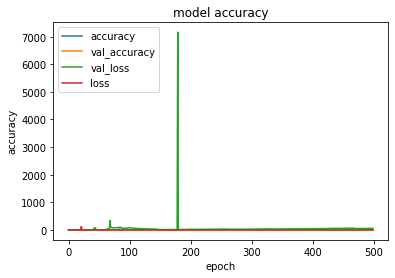

In [297]:
#train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy', 'val_loss', 'loss'], loc='upper left')
plt.show()
